In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Load

In [2]:
# Load the Uber Request Data

uber_traffic = pd.read_csv('Uber Traffic Data Visualization.csv')
uber_traffic.head()

START_DATE*         END_DATE* CATEGORY*       START*            STOP*  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit

In [3]:
uber_traffic.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [4]:
print(uber_traffic.shape)
print('The number of rows in the dataset are',uber_traffic.shape[0])
print('The number of columns in the dataset are',uber_traffic.shape[1])

(1155, 7)
The number of rows in the dataset are 1155
The number of columns in the dataset are 7


In [5]:
uber_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
uber_traffic.size

8085

In [7]:
uber_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
uber_traffic.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [9]:
uber_traffic['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [10]:
uber_traffic['PURPOSE*'].fillna('Meeting', inplace=True)

In [11]:
uber_traffic.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

### Get unique start locations

In [12]:
uber_traffic['START*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

### what is the total number of unique start locations

In [13]:
uber_traffic['START*'].nunique()

176

#### There are a total of 176 unique start locations

### Display all the Uber trips that has the starting point of San Francisco

In [14]:
uber_traffic.loc[uber_traffic['START*']=='Fort Pierce']

START_DATE*         END_DATE* CATEGORY*       START*            STOP*  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0          Meeting  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit

In [15]:
# Use print statements to display the value counts for each column together

print("CATEGORY* Value Counts:")
print(uber_traffic['CATEGORY*'].value_counts())
print("\n")

print("START* Value Counts:")
print(uber_traffic['START*'].value_counts())
print("\n")

print("STOP*  Value Counts:")
print(uber_traffic['STOP*'].value_counts())
print("\n")

print("'PURPOSE*  Value Counts:")
print(uber_traffic['PURPOSE*'].value_counts())
print("\n")

CATEGORY* Value Counts:
Business    1078
Personal      77
Name: CATEGORY*, dtype: int64


START* Value Counts:
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Latta                 1
Nugegoda              1
Jamestown Court       1
Ingleside             1
Rose Hill             1
Name: START*, Length: 176, dtype: int64


STOP*  Value Counts:
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
Katy                  1
Queens                1
Wake Forest           1
Columbia Heights      1
Washington            1
Name: STOP*, Length: 187, dtype: int64


'PURPOSE*  Value Counts:
Meeting            689
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Na

### what is the most popular starting point for the Uber drivers

In [16]:
uber_traffic['START*'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Latta                 1
Nugegoda              1
Jamestown Court       1
Ingleside             1
Rose Hill             1
Name: START*, Length: 176, dtype: int64

#### Cary is the most popular starting point

### what is the most popular dropping point for the Uber drivers

#### Popular means the place that is visited the most

In [18]:
uber_traffic['STOP*'].value_counts()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
Katy                  1
Queens                1
Wake Forest           1
Columbia Heights      1
Washington            1
Name: STOP*, Length: 187, dtype: int64

#### Cary is the most popular Dropping point

### What is the most freequent route taken by Uber drivers

#### print the most freequent route taken by Uber drivers(Route=combination of START & END Points present in the dataset)

In [19]:
uber_traffic.groupby(['START*','STOP*']).size().sort_values(ascending=False).head(10)

START*            STOP*           
Unknown Location  Unknown Location    86
Morrisville       Cary                75
Cary              Morrisville         67
                  Cary                53
                  Durham              36
Durham            Cary                32
Unknown Location  Islamabad           28
Islamabad         Unknown Location    28
Lahore            Lahore              27
Islamabad         Islamabad           25
dtype: int64

### Convert START_DATE*,END_DATE* to datetime

In [20]:
uber_traffic['START_DATE*'] = pd.to_datetime(uber_traffic['START_DATE*'])
uber_traffic['END_DATE*'] = pd.to_datetime(uber_traffic['END_DATE*'])

In [21]:
# Set the style for seaborn
sns.set(style='whitegrid')

### Trip Frequency Over Time

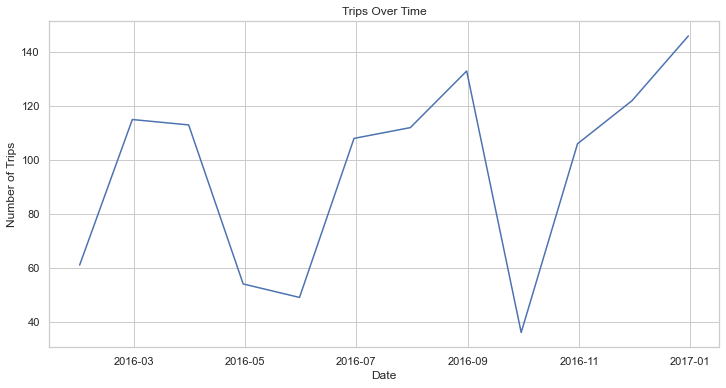

In [22]:
# Resample trips by month and count the number of trips
trips_over_time = uber_traffic.set_index('START_DATE*').resample('M').size()

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=trips_over_time.index, y=trips_over_time.values)
plt.title('Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

### Trip Category Distribution-countplot

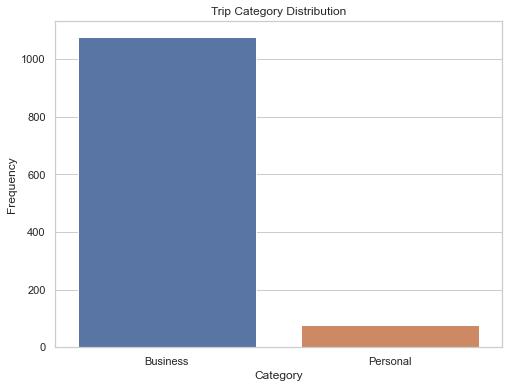

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot( x='CATEGORY*',data=uber_traffic)
plt.title('Trip Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

### Purpose of Trips

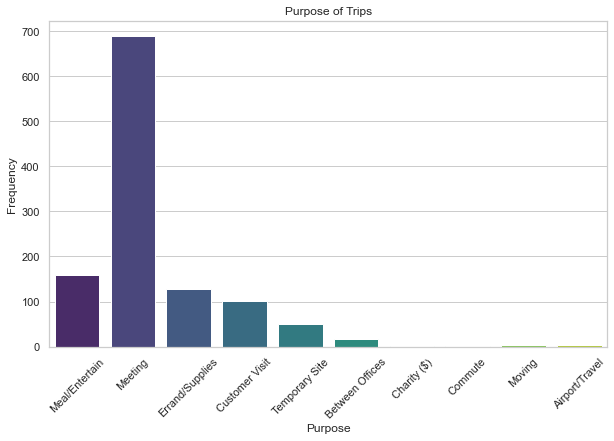

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PURPOSE*',data=uber_traffic, palette='viridis')
plt.title('Purpose of Trips')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Top Start and Stop Locations-Bar plot

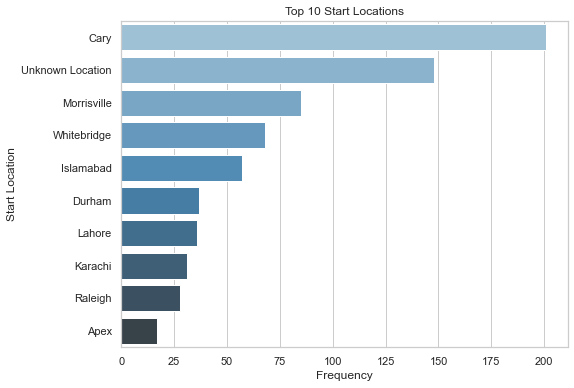

In [25]:
# Top 10 Start Locations
top_start = uber_traffic['START*'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_start.index, x=top_start.values, palette='Blues_d')
plt.title('Top 10 Start Locations')
plt.xlabel('Frequency')
plt.ylabel('Start Location')
plt.show()

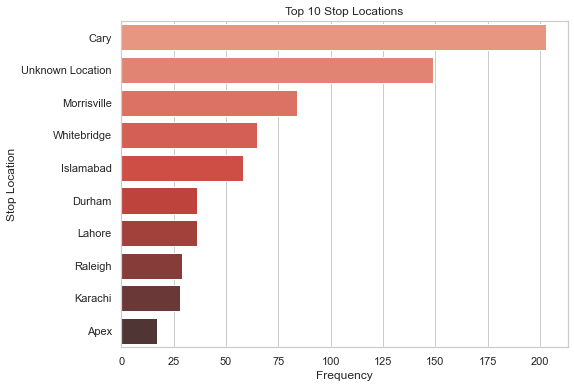

In [26]:
# Top 10 Stop Locations
top_stop = uber_traffic['STOP*'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_stop.index, x=top_stop.values, palette='Reds_d')
plt.title('Top 10 Stop Locations')
plt.xlabel('Frequency')
plt.ylabel('Stop Location')
plt.show()

### Mileage Distribution-Histogram

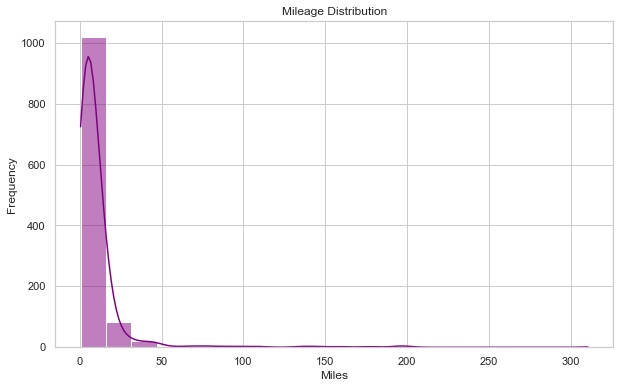

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(x='MILES*',data=uber_traffic,bins=20, color='purple', kde=True)
plt.title('Mileage Distribution')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

### Average Mileage by Trip Purpose-Box Plot

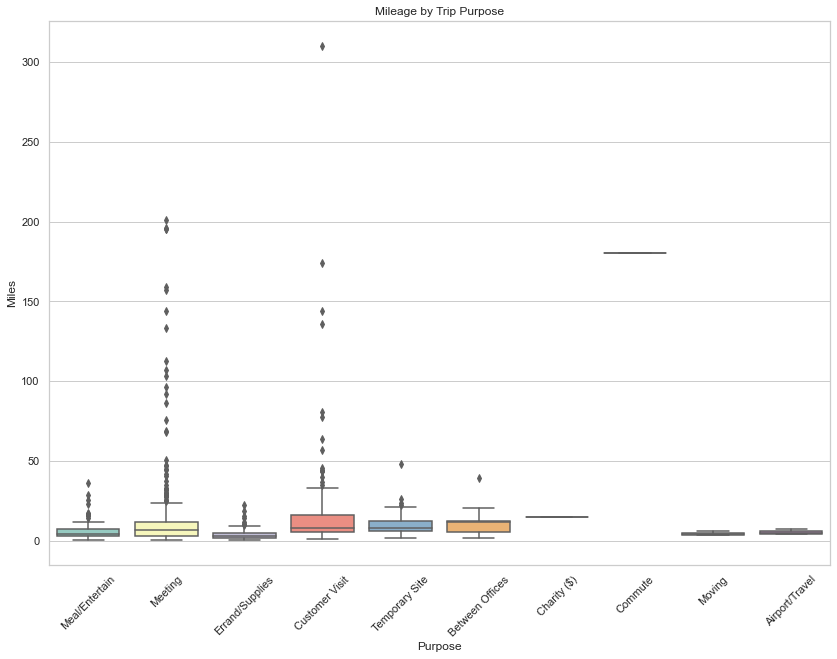

In [28]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='PURPOSE*', y='MILES*',data=uber_traffic,palette='Set3')
plt.title('Mileage by Trip Purpose')
plt.xlabel('Purpose')
plt.ylabel('Miles')
plt.xticks(rotation=45)
plt.show()

### Scatter Plot of Trip Distance vs. Trip Purpose

#### This scatter plot helps visualize how trip distances vary across different purposes.

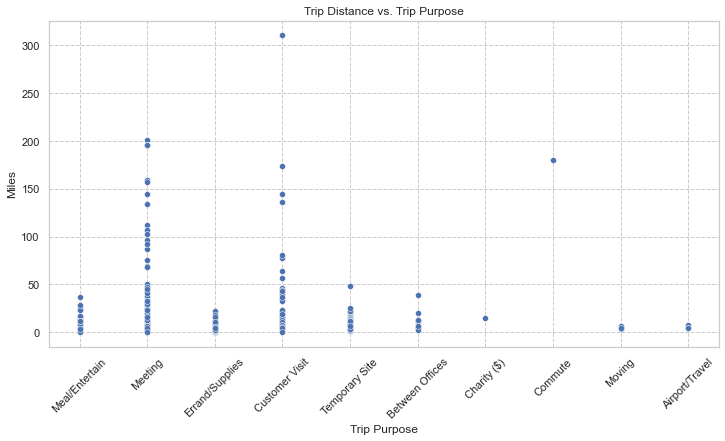

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PURPOSE*', y='MILES*',data=uber_traffic)
plt.title('Trip Distance vs. Trip Purpose')
plt.xlabel('Trip Purpose')
plt.ylabel('Miles')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--')
plt.show()

### Violin Plot of Trip Distances by Category

#### A violin plot combines a box plot with a density plot, showing the distribution of trip distances for each category.

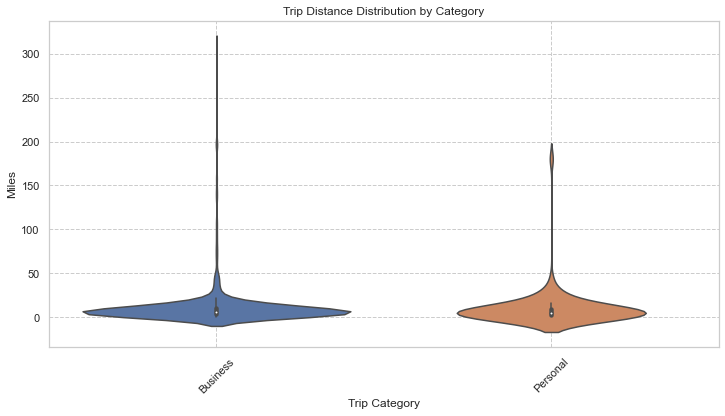

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='CATEGORY*', y='MILES*',data=uber_traffic)
plt.title('Trip Distance Distribution by Category')
plt.xlabel('Trip Category')
plt.ylabel('Miles')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--')
plt.show()

### A strip plot with jitter is often a better alternative to a swarm plot for large datasets. 

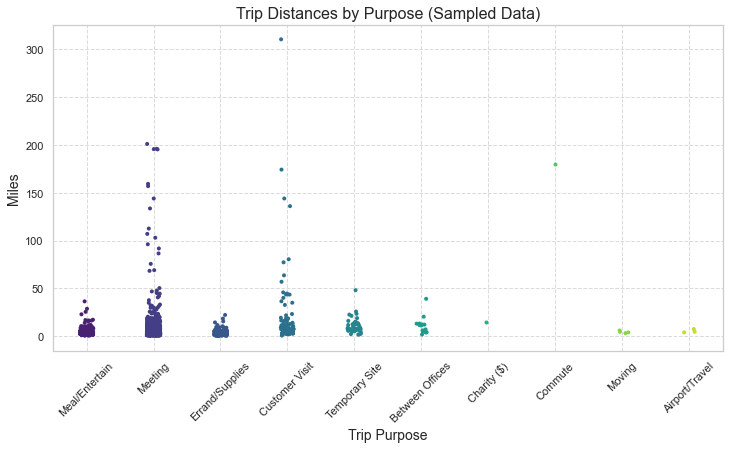

In [31]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='PURPOSE*', y='MILES*',data=uber_traffic,palette='viridis', size=4,jitter=True)
plt.title('Trip Distances by Purpose (Sampled Data)', fontsize=16)
plt.xlabel('Trip Purpose', fontsize=14)
plt.ylabel('Miles', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\Mamatha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mamatha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mamatha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mamatha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mamatha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.0% of 

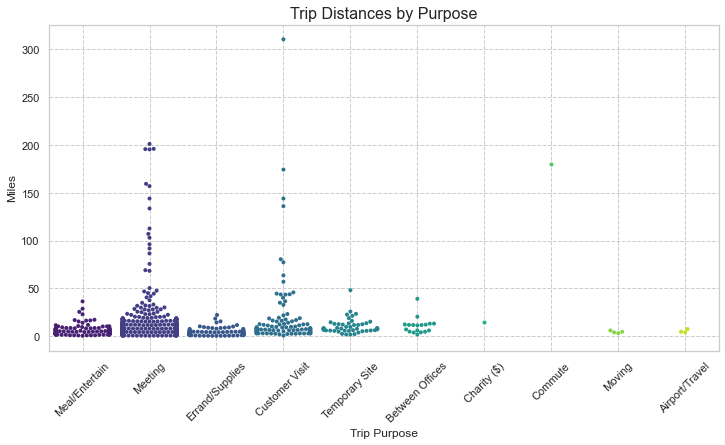

In [32]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='PURPOSE*', y='MILES*',data=uber_traffic,palette='viridis', size=4)
plt.title('Trip Distances by Purpose', fontsize=16)
plt.xlabel('Trip Purpose')
plt.ylabel('Miles')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--')
plt.show()